In [23]:
import pandas as pd

In [24]:
data = pd.read_csv("./data/SpotifyFeatures.csv")

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [26]:
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [27]:
data.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [28]:
data.dropna(subset=["track_name"], inplace=True)

In [29]:
# Data Type analysis and conversion
# Examine the data types of the columns
df_original = data.copy()
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232724 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232724 non-null  object 
 1   artist_name       232724 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232724 non-null  object 
 4   popularity        232724 non-null  int64  
 5   acousticness      232724 non-null  float64
 6   danceability      232724 non-null  float64
 7   duration_ms       232724 non-null  int64  
 8   energy            232724 non-null  float64
 9   instrumentalness  232724 non-null  float64
 10  key               232724 non-null  object 
 11  liveness          232724 non-null  float64
 12  loudness          232724 non-null  float64
 13  mode              232724 non-null  object 
 14  speechiness       232724 non-null  float64
 15  tempo             232724 non-null  float64
 16  time_signature    232724 

#### Observations
The Dataset looks clean from the data types the fields shows.
popularity, duration_ms -> int64
audio_features -> float64
genre, artist_name, track_name, track_id, mode, time_signature -> object

If key or mode were numeric and used for categorical analysis later then we might have to convert them later ut since in this case they are in object datatype meaning pandas is looking at it as a string variable.
We dont need to convert any data to a specific type using astype()

#### AWS S3 file upload (Optional)
I am using linux and setup the aws keys as per my needs.
You can do the same. Only difference in the connection will be you might need to provide the keys manually when setting up the client or resource for boto3.


In [ ]:
# from s3_test import S3Bucket
# connection = S3Bucket(choice="resource")
# connection.setup_connection()
# first_bucket = connection.get_bucket("bucket_name")
# print(first_bucket)

In [ ]:
# first_bucket_object = connection.file_upload("./data/SpotifyFeatures.csv", bucket_name=first_bucket.name)

#### Detecting and visualising outliers
Box plots on numerical features to detect potential outliers

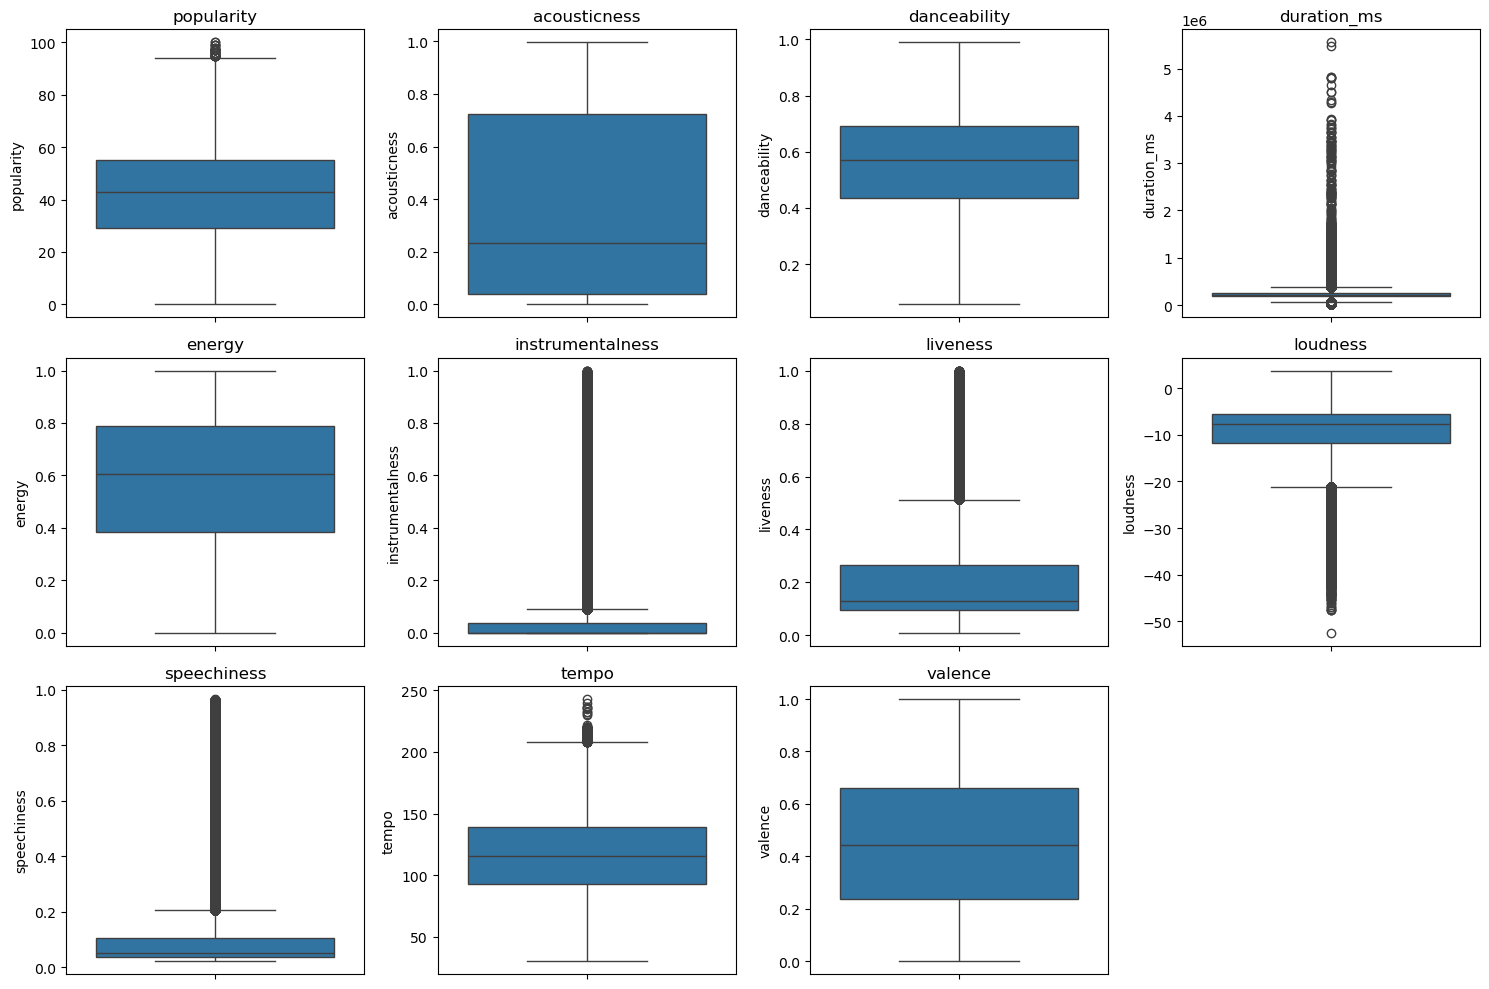

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ["popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness","liveness", "loudness", "speechiness", "tempo", "valence"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()
    

*Observations:* By examining the boxplots, you'll liekly see outliers in features like
duration_ms, loudness, tempo and possibly popularity.
The decision on how to handle these outliers depends on the scope of the project.
For this project we will proceed with teh data including the outliers for the prediction task.

Applying log transformation to features that echibit skewness to make their distribution more normal, which can benefit some machine learning algorithms.

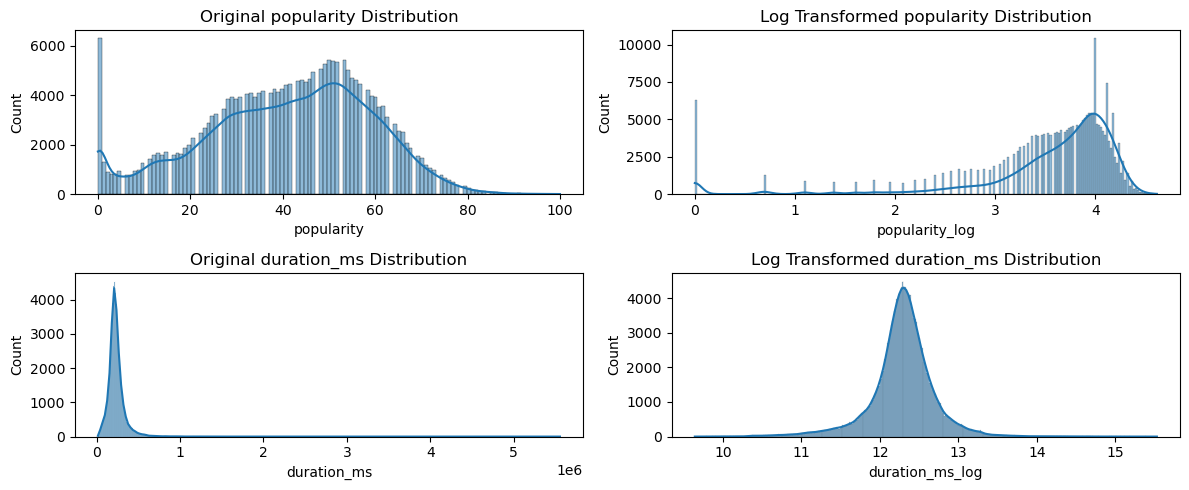


Descriptive Statistics of Log-transformed Features:
          popularity   duration_ms
count  232724.000000  2.327240e+05
mean       41.127490  2.351218e+05
std        18.189986  1.189359e+05
min         0.000000  1.538700e+04
25%        29.000000  1.828562e+05
50%        43.000000  2.204270e+05
75%        55.000000  2.657680e+05
max       100.000000  5.552917e+06


In [31]:
import numpy as np

skewed_features = ["popularity", "duration_ms"]
plt.figure(figsize=(12, 5))
count = 1
for i, feature in enumerate(skewed_features):
    plt.subplot(2, 2, count)
    sns.histplot(data[feature], kde=True)
    plt.title(f"Original {feature} Distribution")
    count += 1
    data[feature + "_log"] = np.log1p(data[feature])
    plt.subplot(2, 2, count)
    sns.histplot(data[feature + "_log"], kde=True)
    plt.title(f"Log Transformed {feature} Distribution")
    count += 1
plt.tight_layout()
plt.show()

print("\nDescriptive Statistics of Log-transformed Features:")
print(data[skewed_features].describe())

#### Explanation
Histogram visualize the frequency distribution of data. Skewness refres to the asymmetry of the distribution.
Log transformation reduces the right skew often seen in popularity and duration, making their distribution more symmetrical.
This can help linear model and improve stability of variance.

In [32]:
# One Hot Encoding
# Convert categorical features to one-hot encoded columns
# Categorical Data -> Numericl Data
print("\nNumber of Unique Genres Before Encoding:", data["genre"].nunique())
print("\nTop 10 Genres:\n", data["genre"].value_counts().nlargest(10))
# One-hot encoding for categorical features
genre_dummies = pd.get_dummies(data["genre"], prefix="genre")
# Concatenate the original DataFrame with the one-hot encoded columns
data = pd.concat([data, genre_dummies], axis=1)
# Drop the original genre column
data.drop("genre", axis=1, inplace=True)
print("\nDataFrame Shape After One-hot Encoding:", data.shape)
print("\nFirst 5 rows After Encoding:\n", data.head())


Number of Unique Genres Before Encoding: 27

Top 10 Genres:
 genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Name: count, dtype: int64

DataFrame Shape After One-hot Encoding: (232724, 46)

First 5 rows After Encoding:
          artist_name                        track_name  \
0     Henri Salvador       C'est beau de faire un Show   
1  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2    Joseph Williams    Don't Let Me Be Lonely Tonight   
3     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCR

#### Visualising Distributions and Feature Relationships
Explore the relationships between features, potentially focusing on how audio features vary across different genres

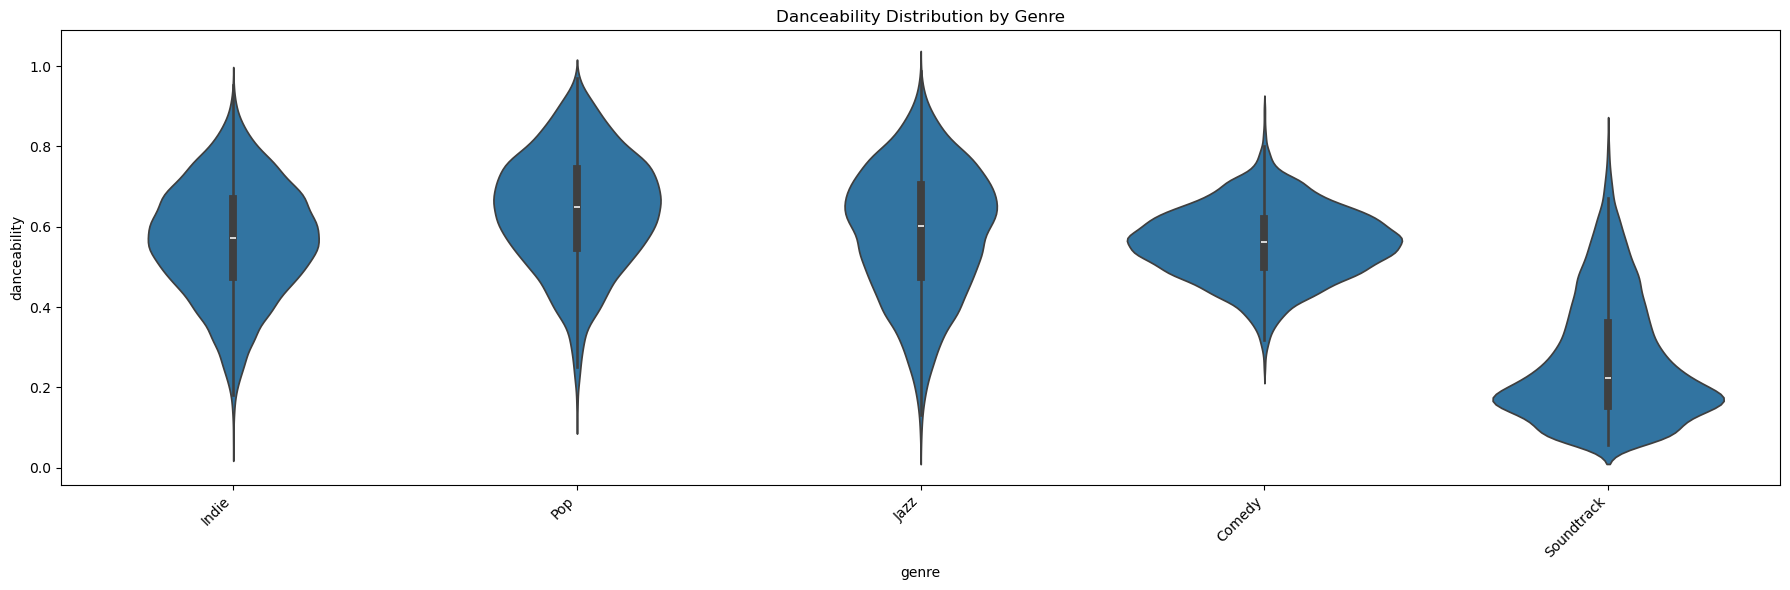

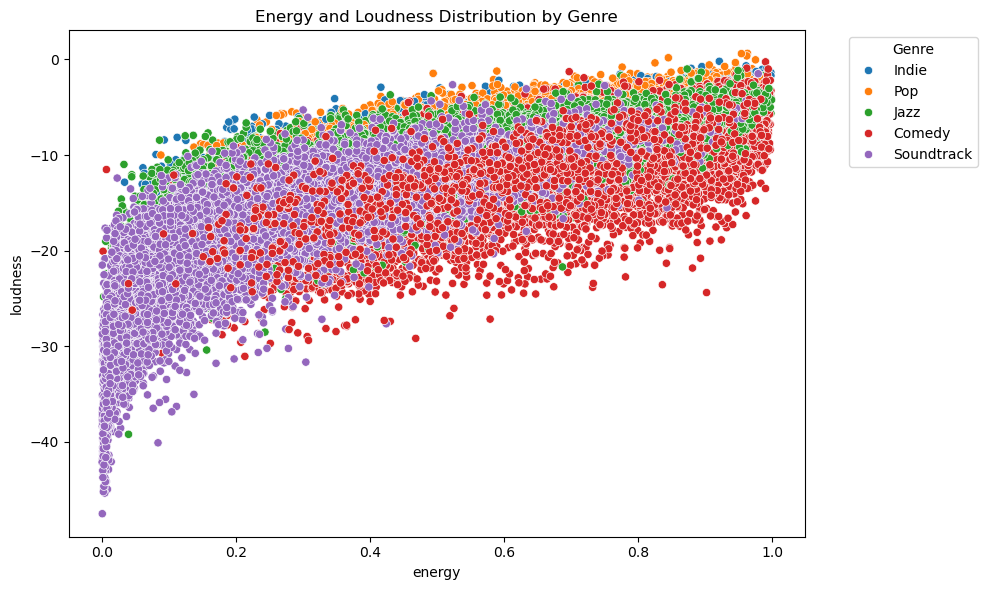

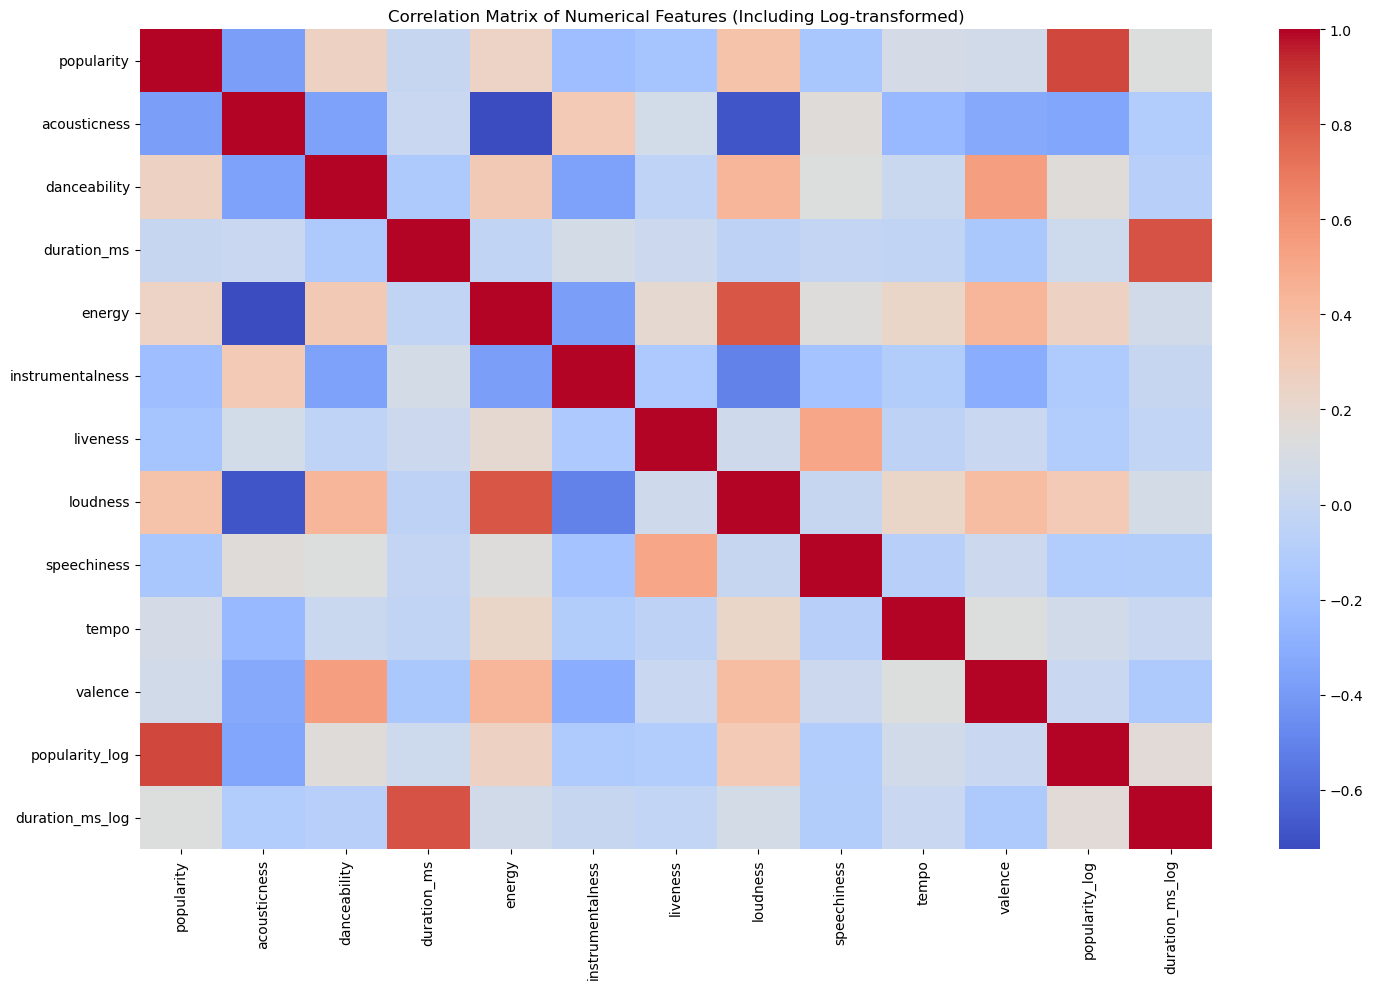

In [ ]:
top_n_genres = df_original["genre"].value_counts().nlargest(5).index.tolist()
# Danceability Distribution by Top 5 Genres
df_top_genres = df_original[df_original["genre"].isin(top_n_genres)].copy()
# Violin plots show the distribution of a numerical variable across different categories
plt.figure(figsize=(18,6))
sns.violinplot(x="genre", y="danceability", data=df_top_genres)
plt.title("Danceability Distribution by Genre")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#Energy and Loudness Distribution by Top 5 Genres
# Scatter plots visualize the relationship between two numerical variables, with points colored by a categorical variable
plt.figure(figsize=(10,6))
sns.scatterplot(x="energy", y="loudness", hue="genre", data=df_top_genres)
plt.title("Energy and Loudness Distribution by Genre")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Correlation matrix by differnet Genres
# The Correlation matrix and heatmap show the linear relationships between all pairs of numerical features
correlation_matrix = data[numerical_features + ["popularity_log", "duration_ms_log"]].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features (Including Log-transformed)")
plt.tight_layout()
plt.show()


#### MACHINE LEARNING
We can now prepare the data for machine learning.
Independent Variables and dependent variables for machine learning model.

In [54]:
# This step defines the columns that will be used as input to the model and which column the model will try to predict.
features = []
for col in data.columns:
    if col not in ["track_id", "artist_name", "track_name", "popularity", "key", "mode","time_signature"]:
        features.append(col)
target = "popularity_log"
X = data[features]
y = data[target]
print("\nFeatures X Shape:", X.shape)
print("\nTarget y Shape:", y.shape)
print("\nFirst 5 rows of Features X:\n", X.head())
print("\nFirst 5 rows of Target y:\n", y.head())


Features X Shape: (232724, 39)

Target y Shape: (232724,)

First 5 rows of Features X:
    acousticness  danceability  duration_ms  energy  instrumentalness  \
0         0.611         0.389        99373   0.910             0.000   
1         0.246         0.590       137373   0.737             0.000   
2         0.952         0.663       170267   0.131             0.000   
3         0.703         0.240       152427   0.326             0.000   
4         0.950         0.331        82625   0.225             0.123   

   liveness  loudness  speechiness    tempo  valence  ...  genre_Pop  \
0    0.3460    -1.828       0.0525  166.969    0.814  ...      False   
1    0.1510    -5.559       0.0868  174.003    0.816  ...      False   
2    0.1030   -13.879       0.0362   99.488    0.368  ...      False   
3    0.0985   -12.178       0.0395  171.758    0.227  ...      False   
4    0.2020   -21.150       0.0456  140.576    0.390  ...      False   

   genre_R&B  genre_Rap  genre_Reggae  genre_

##### Data Scaling
Standardize the numerical features to have zero mean and unit variance. This is important for may machine learning algorithms.

In [55]:
from sklearn.preprocessing import StandardScaler
numerical_cols_for_scaling = ["acousticness", "danceability", "duration_ms_log", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]

scaler = StandardScaler()
X[numerical_cols_for_scaling] = scaler.fit_transform(X[numerical_cols_for_scaling])
print("\nFirst 5 rows of Scaled Features X:\n", X[numerical_cols_for_scaling].head())


First 5 rows of Scaled Features X:
    acousticness  danceability  duration_ms_log    energy  instrumentalness  \
0      0.683372     -0.890943        -1.918185  1.286904         -0.489820   
1     -0.345471      0.191988        -1.120943  0.630246         -0.489820   
2      1.644565      0.585291        -0.592431 -1.669953         -0.489820   
3      0.942697     -1.693713        -0.864930 -0.929790         -0.489820   
4      1.638928     -1.203431        -2.372590 -1.313156         -0.083568   

   liveness  loudness  speechiness     tempo   valence  
0  0.660658  1.290703    -0.367971  1.595608  1.380742  
1 -0.322837  0.668683    -0.183084  1.823254  1.388432  
2 -0.564929 -0.718399    -0.455833 -0.588322 -0.334220  
3 -0.587625 -0.434814    -0.438045  1.750598 -0.876394  
4 -0.065616 -1.930596    -0.405165  0.741435 -0.249626  


/tmp/ipykernel_45368/2682523196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols_for_scaling] = scaler.fit_transform(X[numerical_cols_for_scaling])


##### Splitting Data into Training and Testing Sets
Divide the dataset into two parts: one for training the machine learning and the another for evaluatingits performance on unseen data.

In [56]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Set Shape:", X_train.shape)
print("\nTesting Set Shape:", X_test.shape)
print("\nTraining Target Shape:", y_train.shape)
print("\nTesting Target Shape:", y_test.shape)


Training Set Shape: (186179, 39)

Testing Set Shape: (46545, 39)

Training Target Shape: (186179,)

Testing Target Shape: (46545,)


##### Model Selection
Choose a machine learning model suitable for regression.
In this case I have choosen Regression.

In [57]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the model
model = RandomForestRegressor(random_state=42)

##### Model Training
Train the selected machine learning model using the training data

In [58]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

##### Model Evaluation
Asses the performance of the trained model on the unseen test data

In [59]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the predictions
# The R-squared score indicates how well the independent variables explain the variance in the dependent variable
r2 = r2_score(y_test, y_pred)
# Mesuares the avergae squared ddifference beteern the predicted and the actial values
mse = mean_squared_error(y_test, y_pred)
# Measures the average absolute difference between the predicted and actial values.
# Lower values are better and more interpretable than MSE
# because they are in the same units as the target variable.
mae = mean_absolute_error(y_test, y_pred)
print("\nModel Evaluation:")
print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Model Evaluation:
R-squared: 0.9999999997000221
Mean Squared Error: 2.0196082673124275e-10
Mean Absolute Error: 1.6490552390970118e-07
